In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from collections import defaultdict
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [4]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(400),
    Dense(130),
    Dense(10, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 400)                 │       1,082,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 130)                 │          52,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,135,600 (4.33 MB)

 Trainable params: 1,135,600 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9072 - loss: 0.2851
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9783 - loss: 0.0712
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9839 - loss: 0.0502
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9867 - loss: 0.0415
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9887 - loss: 0.0346


In [27]:
y_proba = model.predict(x_test)
y_pred = [np.argmax(x) for x in y_proba]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


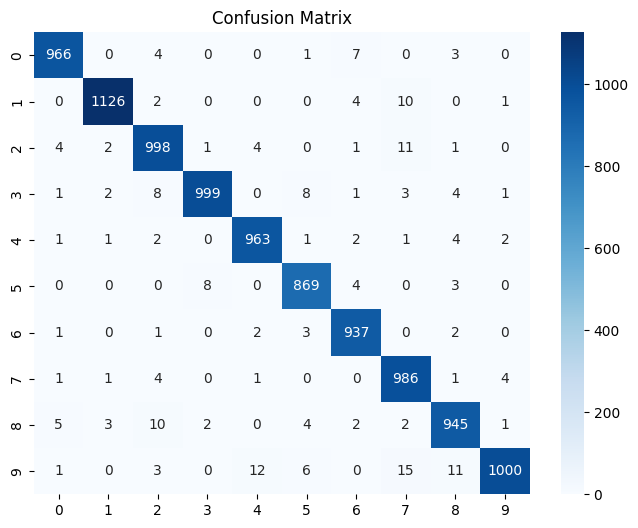

In [15]:
cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[x for x in range(10)], yticklabels=[x for x in range(10)])
plt.title('Confusion Matrix')
plt.show()

In [55]:
accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_pred, average='macro'), 4)
roc_auc = round(roc_auc_score(y_test, y_proba, multi_class='ovr'), 4)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9789
Precision: 0.9791
Recall: 0.9787
F1 Score: 0.9788
ROC AUC Score: 0.9996


In [56]:
res = defaultdict(list)
res['accuracy'].append([accuracy, precision, recall, f1, roc_auc])

Text(0.5, 1.0, 'ROC Curve')

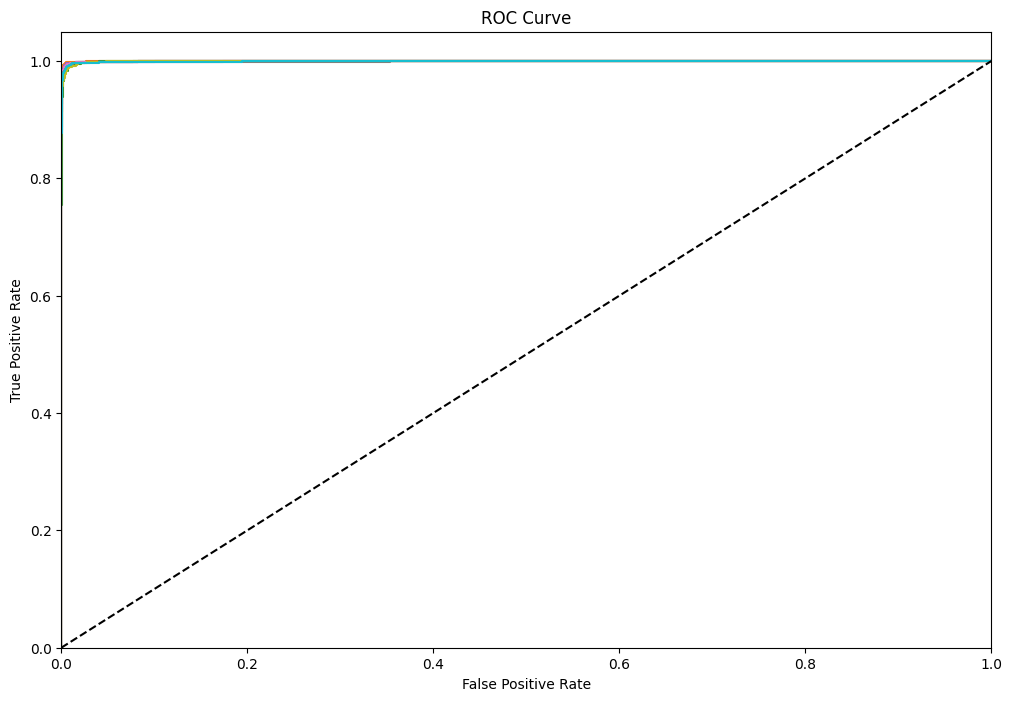

In [35]:
fpr = {}
tpr = {}
roc_auc = {}
n_classes = 10

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_proba[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

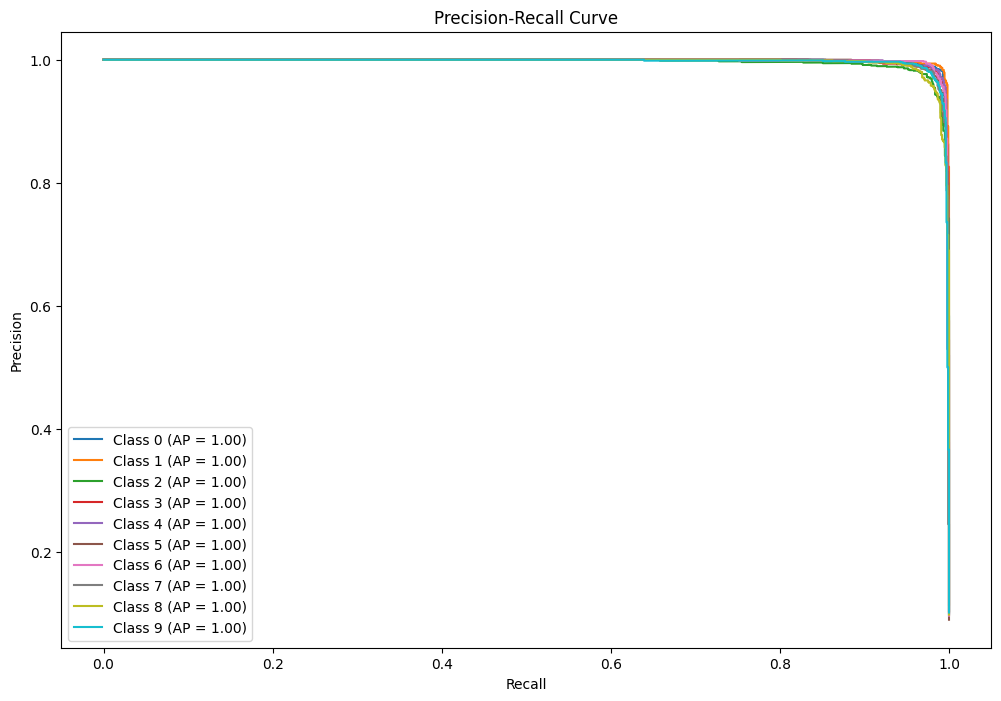

In [37]:
precision = {}
recall = {}
average_precision = {}
n_classes = 10

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_proba[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_proba[:, i])

plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Попробовать Tensorboard
https://github.com/Antonoof/TensorFlow-Scikit-learn-Keras/blob/main/7.%20Fashion_Mnist%20tf%2Ckeras.ipynb

In [69]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='selu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(200),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=32)

y_proba = model.predict(x_test)
y_pred = [np.argmax(x) for x in y_proba]

accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_pred, average='macro'), 4)
roc_auc = round(roc_auc_score(y_test, y_proba, multi_class='ovr'), 4)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

res['accuracy 2'].append([accuracy, precision, recall, f1, roc_auc])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9153 - loss: 0.2797
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9806 - loss: 0.0626
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9836 - loss: 0.0519
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9878 - loss: 0.0400
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0316
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9835
Precision: 0.9837
Recall: 0.9831
F1 Score: 0.9834
ROC AUC Score: 0.9999


In [93]:
print('      |Model|      |acc|    |pre|   |rec|   |f1|  |ROC AUC|')

for x in res:
  print(f'Модель {x}: {res[x]}')

      |Model|      |acc|    |pre|   |rec|   |f1|  |ROC AUC|
Модель accuracy: [[0.9789, 0.9791, 0.9787, 0.9788, 0.9996]]
Модель accuracy 2: [[0.9835, 0.9837, 0.9831, 0.9834, 0.9999]]
